SECTION 1
DATA EXPLORATION

In [18]:
import numpy as np 
import pandas as pd 
from time import time
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
data = pd.read_csv("wine+quality\winequality-red.csv", sep=";")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
n_wines = data.shape[0]

quality_above_6 = data.loc[data['quality'] > 6]
n_above_6 = quality_above_6.shape[0]

quality_below_5 = data.loc[data['quality'] < 5]
n_below_5 = quality_below_5.shape[0]

mid_quality = data.loc[(data['quality'] >= 5) & (data['quality'] <= 6)]
mid_quality_shape = mid_quality.shape[0]

high_quality_percent = n_above_6*100/n_wines

print(f"Total number of wine data: {n_wines}")
print(f"Wines with rating 7 and above: {n_above_6}")
print(f"Wines with rating less than 5: {n_below_5}")
print(f"Wines with rating 5 and 6: {mid_quality_shape}")
print(f"Percentage of wines with quality 7 and above: {high_quality_percent:.2f}")

np.round(data.describe())

Total number of wine data: 1599
Wines with rating 7 and above: 217
Wines with rating less than 5: 63
Wines with rating 5 and 6: 1319
Percentage of wines with quality 7 and above: 13.57


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


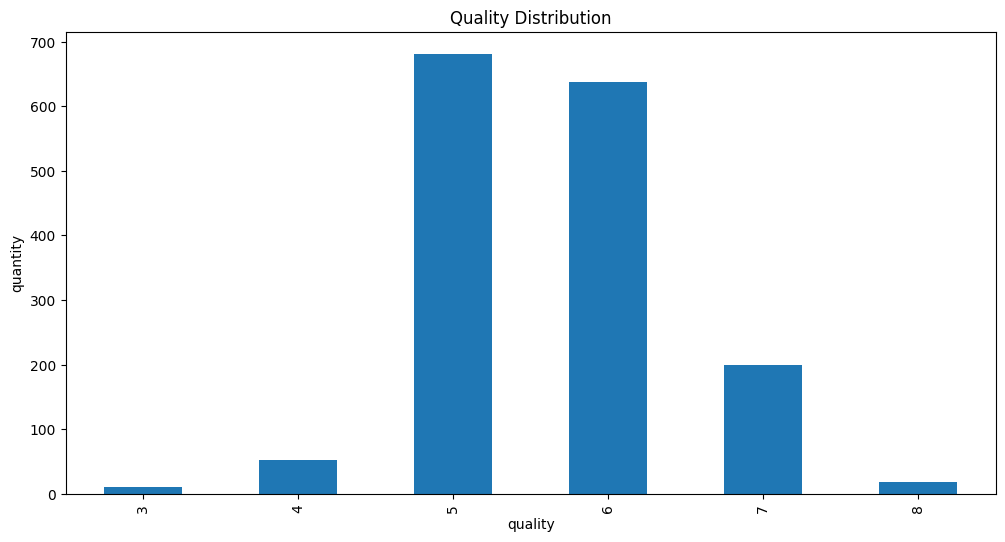

C:\Users\yusuf\AppData\Local\Temp\ipykernel_6924\907188079.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['quality'])


<Axes: xlabel='quality', ylabel='Density'>

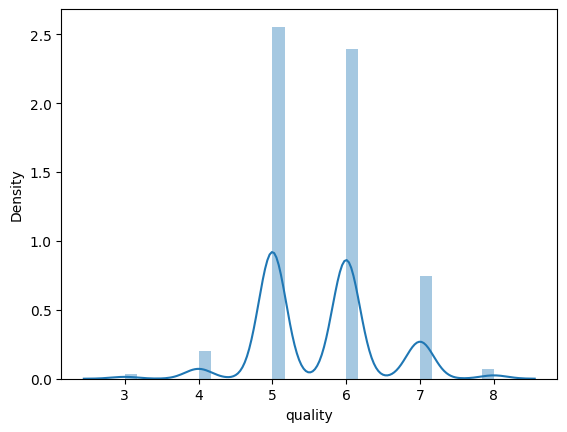

In [36]:
distribution = data['quality'].value_counts().sort_index()
plt.figure(figsize=(12,6))
distribution.plot(kind='bar')
plt.title('Quality Distribution')
plt.xlabel('quality')
plt.ylabel('quantity')
plt.show()
sns.distplot(data['quality'])